# (Arabic) Recipe 5-1. Implementing Multiclass Classification

###  Import the libraries

In [1]:
import pandas as pd

### import data

In [2]:
Data = pd.read_csv("arabic_dataset_classifiction.csv", encoding='utf-8')

dataset source : [DataSet for Arabic Classification](https://data.mendeley.com/datasets/v524p5dhpj/2) <br>
it is collected from 3 Arabic online newspapers: Assabah, Hespress and Akhbarona using semi-automatic web crawling process.

### Data understanding

In [3]:
Data.head()

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


In [4]:
Data.rename(columns={"targe": "Target", "text": "Text"}, inplace = True)

In [5]:
Data.head()

,Text,Target
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


In [6]:
Data.shape

(111728, 2)

In [7]:
Data['Target'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
Data.dtypes

Text      object
Target     int64
dtype: object

In [20]:
Data[Data['Target'] == 0].Text.iloc[350]

'قالت إنها انتظرت خمس سنوات لتشارك فد قالت الفنانة بديعة الصنهاجي تتقمص دور عبلة سيتكوم ديما جيران شاشة القناة الثانية قلة أعمالها التلفزيونية راجعة عدم تفكيرها الاحتراف تخرجها معهد الفن المسرحي والتنشيط الثقافي وأضافت بديعة تصريح الصباح دراستها المسرح لمدة سبع سنوات كانت باب الهواية مشيرة أنها ركزت أثناء دراستها تجسيد أدوار باللغة الفرنسية لمسرحيات كلاسيكية لموليير وتشيكوف وكان أول ظهور لبديعة الصنهاجي شاشة التلفزيون رفقة المخرج نور الدين لخماري السلسلة البوليسية القضية تولى أصدقائها مهمة اقتراحها للعمل وأوضحت الصنهاجي بخصوص دورها سلسلة القضية أنه الشخصيات تعتز بتقمصها رغم أنه الأدوار الثانوية مضيفة بحكم وظيفتها يكن ممكنا بالنسبة إليها الغياب لمدة طويلة العمل احتراف الفن أمر صعب وهذا جعلني بعيدة لعدة سنوات عنه ارتباطي بعملي مجالي التسويق والاتصال مجال الوكالات العقارية ساهم تقول بديعة أسباب تأخرها دخول المجال الفني وأكدت بديعة أنها المعجبات بأداء الفنان حسن الفد فبعد عرض السلسلة الفكاهية شانيلي سنة بحثت رقمه الهاتفي وطلبت باعتبارها طالبة بالمعهد المسرحي يسند إليها أحد الأدوار عمل جديد

by observing the content, i realized that the labels are represntative of the following <br>
- 0 celebrities <br>
- 1 crimes <br>
- 2 economy <br>
- 3 politics <br>
- 4 sports

In [38]:
categories = {
              0 : 'celebrities', 
              1 : 'crimes', 
              2 : 'economy', 
              3 : 'politics', 
              4 : 'sports'
             }

In [11]:
# check for null values
pd.isnull(Data).sum()

Text      2939
Target       0
dtype: int64

In [12]:
# Selecting non null data
Data = Data[pd.notnull(Data['Text'])]

In [13]:
Data.shape

(108789, 2)

In [14]:
Data.groupby('Target').Text.count().sort_values(ascending=False)

Target
4    43675
3    20485
1    16728
2    14165
0    13736
Name: Text, dtype: int64

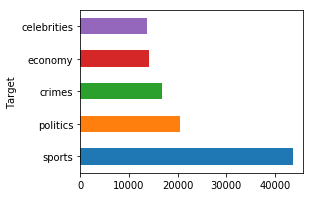

In [39]:
# Lets plot it and see

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,3))
Data.groupby('Target').Text.count().sort_values(ascending=False).plot(kind='barh') # for each product, how many complaints
ax = plt.gca()

labels = []
for item in ax.get_yticklabels():
    labels.append(categories[int(item.get_text())])
ax.set_yticklabels(labels) # note below
plt.show()

- **note:** in the previous cell, i couldnot just make `ax.set_yticklabels(categories.values())` b/c the order of the label in the returned list (from the previous instruction) will be different than the actual order of labels that should be shown on the plot
    - note that this mismatch of labels happens due to the sorting operation in the previous cell

### preprocessing

In [17]:
# remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('arabic')

Data['Text'] = Data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [19]:
import re

# remove punctuation and multiple spaces
pattern_punctuation = '[^a-zA-z0-9ء-ي\s]' # for punctuation (not numeric nor arabic nor english letters)
pattern_multi_spaces = '[ ]{2,}'

Data['Text'] = Data['Text'].apply(lambda x: re.sub(pattern_punctuation, '' , x))
Data['Text'] = Data['Text'].apply(lambda x: re.sub(pattern_multi_spaces, ' ' , x))

### Splitting the data

In [21]:
from sklearn import model_selection
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['Text'], Data['Target'])

### Feature engineering using TF-IDF

Here we consider maximum features to be 5000.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Data['Text'])

xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

**note:** tokenization is done in the tfidf step (i did not make it manually)

### Model building and evaluation

In [40]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression

model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, \
                   intercept_scaling=1, max_iter=100, multi_class='ovr',n_jobs=1, \
                   penalty='l2', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy)

# Classification report
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf), target_names= categories.values()))     

Accuracy:  0.9515773218619016
             precision    recall  f1-score   support

celebrities       0.96      0.93      0.95      3372
     crimes       0.95      0.97      0.96      4232
    economy       0.90      0.89      0.90      3503
   politics       0.90      0.91      0.91      5213
     sports       0.99      0.99      0.99     10878

avg / total       0.95      0.95      0.95     27198



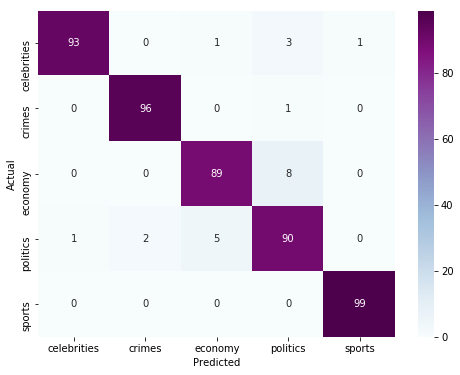

In [41]:
#confusion matrix
conf_mat = metrics.confusion_matrix(valid_y, model.predict(xvalid_tfidf))

from sklearn.preprocessing import normalize

normalized_conf_mat = (normalize(conf_mat, axis=1, norm='l1')*100).astype(int) #me ahmed: i will show the percentage instead of raw count, b/c the records in classes are not balanced

import seaborn as sns
# Vizualizing confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(normalized_conf_mat, annot=True, fmt='d', cmap="BuPu", \
            xticklabels=categories.values(), \
            yticklabels=categories.values())

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [53]:
# Prediction example
texts = ['سيقام كأس العالم القادم فى قطر']

print(texts)

text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)

print(" - Predicted as: '{}'".format(categories[predictions[0]]))

['سيقام كأس العالم القادم فى قطر']
 - Predicted as: 'sports'


### my addition : interpret the model

interpreting the model is my addition (it does not exits in the textbook)

In [60]:
model.coef_.shape

(5, 5000)

**note** LR when used in multiclass classification, is done by one-vs-rest for each class, that's why I have 5 linear equation, one equation for each class-vs-rest. <br>
so, i suppose, when a new input come to have a prediction, the new input features is multiplied by each of the four equations `dot(new_input, LR_model.coef_) + LR_model.intercept_`, then we get five predictions from each equation by apply sigmoid to the previous product, and lastly, we take the largest prediction to be our answer.

In [63]:
len(tfidf_vect.vocabulary_)

5000

In [79]:
import numpy as np

for i in range(len(categories)):
    class_ = categories[i]
    top_5_idx = np.argsort(model.coef_[i])[-5:]
    top_5_words = []
    
    for idx in top_5_idx:
        top_5_words.append(tfidf_vect.get_feature_names()[idx])
        
    
    print('top words/features for class ',class_, ' is: ', top_5_words)
    
    


top words/features for class  celebrities  is:  ['البرنامج', 'الثقافي', 'الثقافة', 'الفنانة', 'الفنان']
top words/features for class  crimes  is:  ['القضائية', 'قبل', 'لهسبريس', 'هسبريس', 'عناصر']
top words/features for class  economy  is:  ['البنك', 'أسعار', 'السوق', 'المقاولات', 'شركة']
top words/features for class  politics  is:  ['السياسي', 'لحزب', 'الملك', 'حزب', 'الحزب']
top words/features for class  sports  is:  ['الجامعة', 'كأس', 'الفريق', 'القدم', 'الرياضي']


### further iterations for improvement:
- see what the model sees, how it does its prediction
- try differnet n-grams and different options for the tfidf
- use differnet classical models (Random Forest, SVM, GBM, Neural Networks, Naive Bayes)
- use different feature representation
    - bag of words
    - word embeddings
    - character embeddings
- use deep learning methods (RNN, LSTM)